# **GrabCut**

Mask R CNN, image segmentation etc are all algorithms that have become extremely useful in today’s world. These algorithms perform well because of the concept involving separation between the foreground and the background. Doing this is quite simple when it comes to OpenCV and this process can be done interactively by drawing the outline ourselves. 

In this practice session, we will use an algorithm called GrabCut to interactively segregate the foreground from the background in an image. 

To read about it more, please refer [this](https://analyticsindiamag.com/how-to-extract-foreground-from-images-interactively-using-grabcut/) article.

## **Implementation of the Algorithm**

Let us start by selecting the input image of our choice. I have selected the following image. You can download the image [here](https://c4.wallpaperflare.com/wallpaper/583/268/60/background-toy-dinosaur-t-rex-wallpaper-preview.jpg).
grabcut

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk gensim tensorflow keras torch torchvision \
    tqdm scikit-image --user -q --no-warn-script-location


import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [1]:
# !wget https://c4.wallpaperflare.com/wallpaper/583/268/60/background-toy-dinosaur-t-rex-wallpaper-preview.jpg

--2021-10-28 17:17:56--  https://c4.wallpaperflare.com/wallpaper/583/268/60/background-toy-dinosaur-t-rex-wallpaper-preview.jpg
Resolving c4.wallpaperflare.com (c4.wallpaperflare.com)... 172.67.129.81, 104.21.2.147, 2606:4700:90ce:fa6:8c64:107:837a:53b0
Connecting to c4.wallpaperflare.com (c4.wallpaperflare.com)|172.67.129.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50086 (49K) [image/jpeg]
Saving to: ‘background-toy-dinosaur-t-rex-wallpaper-preview.jpg’

background-toy-dino 100%[===================>]  48.91K  --.-KB/s    in 0.009s  

2021-10-28 17:17:56 (5.32 MB/s) - ‘background-toy-dinosaur-t-rex-wallpaper-preview.jpg’ saved [50086/50086]



### **Loading the Image and Libraries**

Now, I will load this image and import the necessary libraries. I will also specify the foreground and background of the image using the NumPy array. The array consists of only zeros and is constructed with a dimension of 1 row and 65 columns.

In [2]:
import numpy as np
import cv2
input_image = cv2.imread('background-toy-dinosaur-t-rex-wallpaper-preview.jpg')
background_array = np.zeros((1,65),np.float64)
foreground_array = np.zeros((1,65),np.float64)

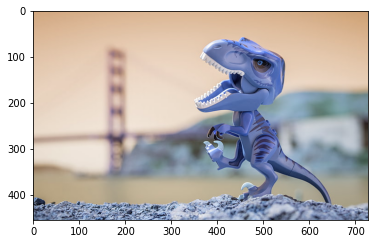

In [4]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

### **Creating Masks**

The first step is to create a mask to separate the foreground and background from the image. But, while displaying the image we still need to display the whole image as one. Hence we will write a function for this and return the individual masks. 

In [5]:
def get_merge_mask(foreground_mask, background_mask, input_image):
    get_mask = foreground_mask[:,:,1:2]/255 + background_mask[:,:,2:3]/255
    if np.max(np.max(np.max(get_mask)))>1:
        return False, input_image
    get_mask = get_mask.astype('uint8')
    return True, foreground_mask + background_mask + input_image*(1-get_mask)

### **Creating a Mouse Event for Drawing**

Since we have to manually draw the outline of the part we want to extract, we need to create an interactive mouse event to understand when the mouse has clicked and the location of where it is moving. 

First, let us define the parameters that are needed for the event. 

In [6]:
draw_lines = False
method = True
x_value,y_value = -1,-1
r = 8

Now, we will use the OpenCV event listeners for mouse button down for both left and right clicks and detect the mouse movement. 

In [7]:
def interactive_draw(event,x_axis,y_axis,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        draw_lines = True
        x_value,y_value = x_axis,y_axis
    if event == cv2.EVENT_RBUTTONUP:
        method = not method
    elif event == cv2.EVENT_MOUSEMOVE:
        if draw_lines is True:
            if method is True:
                cv2.circle(foreground_mask,(x_axis,y_axis),r,(0,255,0),-1)
            else:
                cv2.circle(background_mask,(x_axis,y_axis),r,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        draw_lines = False
        if method is True:
            cv2.circle(foreground_mask,(x_axis,y_axis),r,(0,255,0),-1)
        else:
            cv2.circle(background_mask,(x_axis,y_axis),r,(0,0,255),-1)

### **Initialize and Define the Method**

Now that we have written the functions we will now initialize the required values and define the method as needed. 

In [ ]:
foreground_mask = np.zeros_like(input_image)
background_mask = np.zeros_like(input_image)
cv2.namedWindow('grabcut algorithm')
cv2.setMouseCallback('grabcut',interactive_draw)

We have initialized the masks and called the mouse callback function. Now we can call the functions and our GrabCut algorithm on the image as follows. 

In [1]:
while True:
    source, apply_mask = get_merge_mask(foreground_mask, background_mask, input_image)
    if not source:
        foreground_mask = np.zeros_like(input_image)
        background_mask = np.zeros_like(input_image)
    cv2.imshow('image',apply_mask)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('m'):
        method = not method
        if method:
            print('front')
        else:
            print('back')
    elif key == 13:
        print('cropping')
        output_mask = np.zeros(input_image.shape[:2],np.uint8) + 2
        output_mask[foreground_mask[:,:,1] == 255] = 1
        output_mask[background_mask[:,:,2] == 255] = 0

NameError: ignored

Now we will call the GrabCut algorithm to make the cut for us

In [ ]:
output_mask, background_array,foreground_array = cv2.grabCut(input_image,output_mask,None,background_array,foreground_array,iteration,cv2.GC_INIT_WITH_MASK)        
        output_mask = np.where((output_mask==2)|(output_mask==0),0,1).astype('uint8')
        final_out = input_image*output_mask[:,:,np.newaxis]
        cv2.imshow('final_out',final_out)
        cv2.imwrite('output.jpg',final_out)
    elif key == 27:
        break
cv2.destroyAllWindows()

When you run the program the image will pop up and you will have to draw the foreground on the screen. 
grabcut

Then, press ‘enter’ key and you will see that clearly the background is removed and the image is neatly segmented. 

#**Related Articles:**

> * [Extract Foreground Images with GrabCut Algorithm](https://analyticsindiamag.com/how-to-extract-foreground-from-images-interactively-using-grabcut/)

> * [GAN in simple 8 Steps](https://analyticsindiamag.com/how-to-build-a-generative-adversarial-network-in-8-simple-steps/)

> * [PyTorch vs Keras vs Caffe](https://analyticsindiamag.com/keras-vs-pytorch-vs-caffe-comparing-the-implementation-of-cnn/)

> * [Face Emotion Recognizer](https://analyticsindiamag.com/face-emotion-recognizer-in-6-lines-of-code/)

> * [Sign Language Classification using CNN](https://analyticsindiamag.com/hands-on-guide-to-sign-language-classification-using-cnn/)

> * [Transfer Learning for multi class classification](https://analyticsindiamag.com/transfer-learning-for-multi-class-image-classification-using-deep-convolutional-neural-network/)

> * [FastAI with PyTorch for multiclass Image Classification](https://analyticsindiamag.com/fastai-with-tpu-in-pytorch-for-multiclass-image-classification/)

